# Sheet 1 - Practical Exercise
The datasets we will be using throughout the practical exercises of this course are subsets of the *FIFA 20 complete player dataset* from kaggle.com, which is extracted from the latest edition of FIFA, a football simulation game. In this dataset the player's attributes like personal data (e.g. Nationality, Club, Age, Value, …) and performances (e.g. Agression, Agility, Overall, Potential, …) are collected. (See [FIFA 20 complete player dataset](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv) for details.)

For the individual tasks we provide you with preprocessed data.

Before we start with the actual exercises make sure that you have imported all packages that you need, and loaded the dataset.

In [2]:
# Add your imports and load your data here
import numpy as np
import pandas as pd
import timeit

df_file = pd.read_csv("fifa_20.csv")

## Exercise 1


First create a smaller Dataframe containing only the columns relevant for the coming exercises. These columns are:
- ``short_name``
- ``age``
- ``club``
- ``overall``
- ``potential``
- ``value_eur``
- ``wage_eur``
- ``team_position``

In [21]:
# add code creating a Dataframe with a subset of all available columns
df = df_file[["short_name", "age", "club", "overall", "potential", "value_eur", "wage_eur", "team_position"]]

df.head()

,short_name,age,club,overall,potential,value_eur,wage_eur,team_position
0,L. Messi,32,FC Barcelona,94,94,95500000,565000,RW
1,Cristiano Ronaldo,34,Juventus,93,93,58500000,405000,LW
2,Neymar Jr,27,Paris Saint-Germain,92,92,105500000,290000,CAM
3,J. Oblak,26,Atlético Madrid,91,93,77500000,125000,GK
4,E. Hazard,28,Real Madrid,91,91,90000000,470000,LW


Next write a scaler to scale the values of a column to an interval between a new minimum and maximum value.  
It should use the following signature:

_Hint: Do **not** use a loop over all entries of the column! What other ways are there to manipulate columnar data?_

In [22]:
def my_scaler(column,min_val,max_val):
    # Add your code here
    max_old = column.max()
    min_old = column.min()
    scaled_column = ((max_val - min_val) / (max_old - min_old)) * (column - min_old) + min_val
    return scaled_column

To achieve this your scaler can implement the formula:  
$$\frac{max_{new}-min_{new}}{max_{old}-min_{old}}\cdot (v-min_{old})+min_{new}$$
where $max_{new}$ and $min_{new}$ are the new boundaries of the values, $max_{old}$ and $min_{old}$ are the old boundaries and $v$ is a value from the column that will be scaled.

* Now use your scaler on the column ``value_eur`` and scale it to an interval between $0$ and $100$.  
* Then take the new values for the ``value_eur`` und turn them into discrete values. If a player is below $25$ he should be categorized as ``low``, between $25$ and $50$ he should be categorized as ``low_average`` then between $50$ and $75$ as ``high_average`` and finally any that are above $75$ should be categorized as ``high``.  
* Finally create a histogram to show the distribution of the players' value.

In [23]:
# Add code to use your scaler on the value_eur-column
df_new = pd.DataFrame({"scalar":my_scaler(df.value_eur, 0, 100) })
df_new

,scalar
0,90.521327
1,55.450237
2,100.000000
3,73.459716
4,85.308057
...,...
18273,0.037915
18274,0.037915
18275,0.037915
18276,0.037915


In [24]:
# Add code to turn the new values of the value_eur column into the given discrete values
df_new["categorize"] = pd.cut(df_new.scalar, bins=[0, 25, 50, 75, 101], right=False, labels = ['low', 'low_average', 'high_average', 'high'])
df_new

,scalar,categorize
0,90.521327,high
1,55.450237,high_average
2,100.000000,high
3,73.459716,high_average
4,85.308057,high
...,...,...
18273,0.037915,low
18274,0.037915,low
18275,0.037915,low
18276,0.037915,low


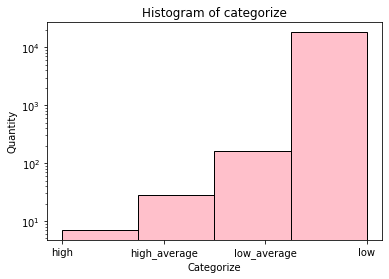

In [25]:
# Add code to create a histogram
import matplotlib.pyplot as plt

plt.hist(df_new.categorize, bins=4, edgecolor="black", color="pink", log=True)
plt.title("Histogram of categorize")
plt.xlabel('Categorize')
plt.ylabel('Quantity')
plt.show()

## Exercise 2

Create a new column called ``leftover-potential`` which shows the difference between the value of ``overall`` and the value of ``potential``, to show how much more a given player can still grow.

In [101]:
# Add code to create the 'leftover-potential'-column
df["leftover_potential"] = df.potential - df.overall 
df

<ipython-input-101-54e055384352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["leftover_potential"] = df.potential - df.overall


,short_name,age,club,overall,potential,value_eur,wage_eur,team_position,leftover_potential
0,L. Messi,32,FC Barcelona,94,94,95500000,565000,RW,0
1,Cristiano Ronaldo,34,Juventus,93,93,58500000,405000,LW,0
2,Neymar Jr,27,Paris Saint-Germain,92,92,105500000,290000,CAM,0
3,J. Oblak,26,Atlético Madrid,91,93,77500000,125000,GK,2
4,E. Hazard,28,Real Madrid,91,91,90000000,470000,LW,0
...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,Beijing Renhe FC,48,56,40000,2000,RES,8
18274,Xiao Mingjie,22,Shanghai SIPG FC,48,56,40000,2000,SUB,8
18275,Zhang Wei,19,Hebei China Fortune FC,48,56,40000,1000,SUB,8
18276,Wang Haijian,18,Shanghai Greenland Shenhua FC,48,54,40000,1000,SUB,6


Next create a histogram that shows how often how much potential is still left over.

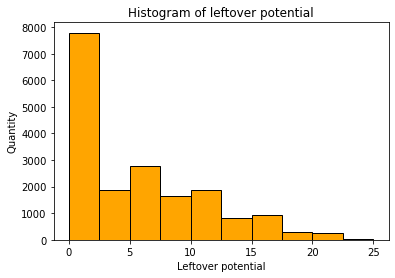

In [35]:
# Add code to create the histogram
plt.hist(df.leftover_potential, bins=10, edgecolor="black", color="orange")
plt.title("Histogram of leftover potential")
plt.xlabel("Leftover potential")
plt.ylabel("Quantity")
plt.show()

## Exercise 3

Group the players by the club they are playing for. Then calculate the average of the ``overall`` column for each team.  

In [86]:
# Add code to group players and calculate the average 'overall' value of each club
grouped_df = df.groupby("club")["overall"].mean()
grouped_df

club
 SSV Jahn Regensburg     64.680000
1. FC Heidenheim 1846    65.793103
1. FC Kaiserslautern     63.750000
1. FC Köln               71.612903
1. FC Magdeburg          64.333333
                           ...    
Zagłębie Lubin           61.600000
Çaykur Rizespor          67.608696
Örebro SK                60.814815
Östersunds FK            60.851852
Śląsk Wrocław            57.000000
Name: overall, Length: 698, dtype: float64

Then print the five Teams with the highest as well as the five teams with the lowest average ``overall`` value, so we can see which teams are the strongest and which teams are the weakest.

In [87]:
# Add code to select the strongest and weakest teams
print("The weakest teams: ")
print(grouped_df.sort_values().iloc[0:6])
print()
print("The strongest teams:")
print(grouped_df.sort_values(ascending=False).iloc[0:6])

The weakest teams: 
club
UCD AFC             53.428571
Finn Harps          55.280000
Crewe Alexandra     55.800000
Waterford FC        55.850000
Bolton Wanderers    56.086957
Leyton Orient       56.851852
Name: overall, dtype: float64

The strongest teams:
club
FC Bayern München    81.304348
Real Madrid          80.121212
Juventus             80.060606
Uruguay              78.608696
FC Barcelona         78.363636
Mexico               78.000000
Name: overall, dtype: float64


Next determine the sum of the ``wages`` of each team. Print the five teams with the highest total ``wages`` and the five teams with the lowest total ``wages``, but only those that spend more than 0€ in total.

In [98]:
# Add code to calculate the total wages and print the highest and lowest spenders
grouped_df1 = df.groupby("club")["wage_eur"].sum()
print("The five teams with the highest total wages:")
print(grouped_df1.sort_values(ascending=False).iloc[0:6])
print()
print("The five teams with the lowest total wages:")
grouped_df2 = df.groupby("club")["wage_eur"].sum()
print(grouped_df2.sort_values().loc[grouped_df2> 0].iloc[0:6])

The five teams with the highest total wages:
club
Real Madrid          5354000
FC Barcelona         4950000
Manchester City      3984000
Juventus             3750000
Manchester United    2874000
Chelsea              2806000
Name: wage_eur, dtype: int64

The five teams with the lowest total wages:
club
US Orléans Loiret Football    1000
GIF Sundsvall                 1000
Seongnam FC                   1000
Śląsk Wrocław                 1000
Shonan Bellmare               4000
Wellington Phoenix            4000
Name: wage_eur, dtype: int64


In [3]:
df_file.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Do the greatest spenders and strongest teams match up? What about the lowest spenders and the weakest teams?